<div class="alert alert-info alert-info"><b><h1>EXERCICI 1</h1></b>
    
Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.
    
</div>

In [1]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from kneed import KneeLocator
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap

<div class="alert alert-info alert-info"><b><h1>Recopilación de datos</h1></b>


    
</div>

In [2]:
df_FaceThai = pd.read_csv('Publicacions Facebook Thailandia.csv')
df_FaceThai.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
# Vemos los valores únicos de cada uno de los atributos
df_FaceThai.nunique()

status_id           6997
status_type            4
status_published    6913
num_reactions       1067
num_comments         993
num_shares           501
num_likes           1044
num_loves            229
num_wows              65
num_hahas             42
num_sads              24
num_angrys            14
Column1                0
Column2                0
Column3                0
Column4                0
dtype: int64

In [4]:
# Comprobamos si hay campos con valor núlo
df_FaceThai.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [5]:
# Comprobamos si hay campos con valor núlo
df_FaceThai.isna().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

<div class="alert alert-info alert-info"><b><h1>Exploración de datos</h1></b>

Realizamos un análisis exploratorio de los datos para comprender su distribución, relaciones y características.   

</div>

In [6]:
df_FaceThai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

<div class="alert alert-info alert-info">


  Información de los campos y descripción de los valores más carácterísticos:

  * **status_id**: código que identifica una publicación. Parece compuesto de 2 valores: el primero que se repite y que                            posiblemente identifica al usuario y el segundo que identifica la publicación. Se debería separar en 2                          columnas diferentes.

  * **status_type**: el tipo de publicación (por ejemplo, foto, enlace, video, estado).

  * **status_published**:  la fecha y hora de subida de la publicación.
    
  * **num_reactions**: el número total de reacciones recibidas en la publicación.

  * **num_comments**: el número total de comentarios realizados en la publicación.

  * **num_shares**: el número total de veces que la publicación se ha compartido.

  * **num_likes**: el número de reacciones "Me gusta" recibidas en la publicación.

  * **num_loves**: el número de reacciones "Me encanta" recibidas en la publicación.

  * **num_wows**: el número de reacciones "Me asombra" recibidas en la publicación.

  * **num_hahas**: el número de reacciones "Me divierte" recibidas en la publicación.

  * **num_sads**: el número de reacciones "Me entristece" recibidas en la publicación.
    
  * **num_angrys**: el número de reacciones "Me enfada" recibidas en la publicación

  * **Column1**, **Column2**, **Column3**, **Column4**: Columnas adicionales que no contienen ningún tipo de datos. Se pueden                                                           borrar del DataFrame.
  

    
  </div>

In [7]:
# Borramos las últimas columnas del dataframe
df_FaceThai.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)
df_FaceThai.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [8]:
#Dividimos el atributo "status_id" en los atributos "status_is" y "pub_id"
df_FaceThai[['user_id', 'pub_id']] = df_FaceThai['status_id'].str.split('_', expand=True)
#Podemos borrar la columna original "status_id"
df_FaceThai.drop(['status_id'], axis=1, inplace=True)

df_FaceThai.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,user_id,pub_id
0,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,246675545449582,1649696485147474
1,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,246675545449582,1649426988507757
2,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,246675545449582,1648730588577397
3,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,246675545449582,1648576705259452
4,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,246675545449582,1645700502213739


In [9]:
# Convertimos el formato del atributo 'status_published' a un formato numérico (número de días desde 1/1/1970)
df_FaceThai['status_published'] = pd.to_datetime(df_FaceThai['status_published']).apply(lambda x: x.timestamp()//(24 * 3600))
df_FaceThai.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,user_id,pub_id
0,video,17643.0,529,512,262,432,92,3,1,1,0,246675545449582,1649696485147474
1,photo,17642.0,150,0,0,150,0,0,0,0,0,246675545449582,1649426988507757
2,video,17642.0,227,236,57,204,21,1,1,0,0,246675545449582,1648730588577397
3,photo,17642.0,111,0,0,111,0,0,0,0,0,246675545449582,1648576705259452
4,photo,17639.0,213,0,0,204,9,0,0,0,0,246675545449582,1645700502213739


In [10]:
df_FaceThai[['status_type']].value_counts()

status_type
photo          4288
video          2334
status          365
link             63
dtype: int64

In [11]:
df_FaceThai[['user_id']].value_counts()

user_id         
246675545449582     2635
614855718638584     1440
134115277150304     1212
1050855161656896     778
848451358648417      450
725980084255106      252
146481362756646      125
819700534875473      102
117059915488335       56
dtype: int64

In [12]:
# Comprobamos si tenemos valores repetidos
df_FaceThai.duplicated().sum()

51

In [13]:
# Eliminamos los registros duplicados
df_FaceThai.drop_duplicates(inplace=True)
df_FaceThai.duplicated().sum()

0

In [14]:
df_FaceThai.shape

(6999, 13)

In [15]:
df_FaceThai.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 0 to 7049
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_type       6999 non-null   object 
 1   status_published  6999 non-null   float64
 2   num_reactions     6999 non-null   int64  
 3   num_comments      6999 non-null   int64  
 4   num_shares        6999 non-null   int64  
 5   num_likes         6999 non-null   int64  
 6   num_loves         6999 non-null   int64  
 7   num_wows          6999 non-null   int64  
 8   num_hahas         6999 non-null   int64  
 9   num_sads          6999 non-null   int64  
 10  num_angrys        6999 non-null   int64  
 11  user_id           6999 non-null   object 
 12  pub_id            6999 non-null   object 
dtypes: float64(1), int64(9), object(3)
memory usage: 765.5+ KB


<div class="alert alert-info alert-info">

El atributo _pub_id_ presenta un valor diferente por cada uno de los registros. Lo podemos eliminar ya que no aporta información
y puedes distorsionar los modelos más adelante.

</div>

In [16]:
# Eliminamos el atributo pub_id del dataframe
df_FaceThai = df_FaceThai.drop('pub_id', axis=1)
df_FaceThai.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,user_id
0,video,17643.0,529,512,262,432,92,3,1,1,0,246675545449582
1,photo,17642.0,150,0,0,150,0,0,0,0,0,246675545449582
2,video,17642.0,227,236,57,204,21,1,1,0,0,246675545449582
3,photo,17642.0,111,0,0,111,0,0,0,0,0,246675545449582
4,photo,17639.0,213,0,0,204,9,0,0,0,0,246675545449582


In [17]:
#Convertimos en dummies los atributos status_type y user_id
df_FaceThai = pd.get_dummies(df_FaceThai, columns = ["status_type", "user_id"], drop_first=True)
df_FaceThai.head()

,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,...,status_type_status,status_type_video,user_id_117059915488335,user_id_134115277150304,user_id_146481362756646,user_id_246675545449582,user_id_614855718638584,user_id_725980084255106,user_id_819700534875473,user_id_848451358648417
0,17643.0,529,512,262,432,92,3,1,1,0,...,0,1,0,0,0,1,0,0,0,0
1,17642.0,150,0,0,150,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,17642.0,227,236,57,204,21,1,1,0,0,...,0,1,0,0,0,1,0,0,0,0
3,17642.0,111,0,0,111,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,17639.0,213,0,0,204,9,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [18]:
df_FaceThai.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 0 to 7049
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   status_published         6999 non-null   float64
 1   num_reactions            6999 non-null   int64  
 2   num_comments             6999 non-null   int64  
 3   num_shares               6999 non-null   int64  
 4   num_likes                6999 non-null   int64  
 5   num_loves                6999 non-null   int64  
 6   num_wows                 6999 non-null   int64  
 7   num_hahas                6999 non-null   int64  
 8   num_sads                 6999 non-null   int64  
 9   num_angrys               6999 non-null   int64  
 10  status_type_photo        6999 non-null   uint8  
 11  status_type_status       6999 non-null   uint8  
 12  status_type_video        6999 non-null   uint8  
 13  user_id_117059915488335  6999 non-null   uint8  
 14  user_id_134115277150304 

In [19]:
df_FaceThai.select_dtypes(include=['float','int']).describe().round(5).T

,count,mean,std,min,25%,50%,75%,max
status_published,6999.0,17121.08401,693.31653,15536.0,16868.0,17487.0,17596.0,17695.0
num_reactions,6999.0,224.99457,452.88075,0.0,17.0,58.0,216.0,4710.0
num_comments,6999.0,225.55208,892.74301,0.0,0.0,4.0,22.0,20990.0
num_shares,6999.0,40.25861,132.04690,0.0,0.0,0.0,4.0,3424.0
num_likes,6999.0,209.94671,439.55033,0.0,17.0,57.0,182.0,4710.0
num_loves,6999.0,12.75154,40.10687,0.0,0.0,0.0,3.0,657.0
num_wows,6999.0,1.25289,8.72555,0.0,0.0,0.0,0.0,278.0
num_hahas,6999.0,0.69796,3.97091,0.0,0.0,0.0,0.0,157.0
num_sads,6999.0,0.23260,1.48111,0.0,0.0,0.0,0.0,51.0
num_angrys,6999.0,0.11016,0.68858,0.0,0.0,0.0,0.0,31.0


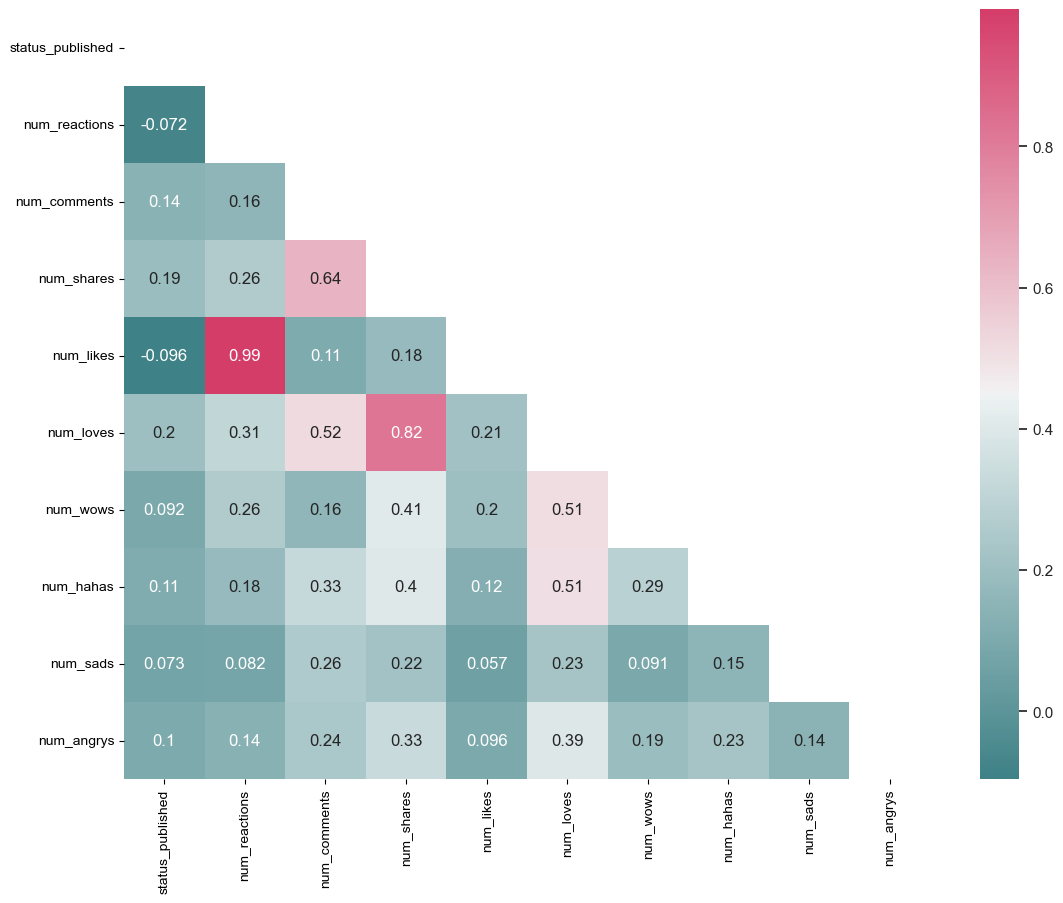

In [20]:
# Comprobamos mediante un heatmap las correlaciones entre las variables de tipo numérico
fig, ax = plt.subplots(figsize=(13, 10))
sns.set_theme(style="darkgrid")
cmap = sns.diverging_palette(200, 0, as_cmap=True)
matrix = np.triu(df_FaceThai.select_dtypes(include=['float','int']).corr())
sns.heatmap(df_FaceThai.select_dtypes(include=['float', 'int']).corr(), annot=True, mask=matrix, cmap=cmap)
plt.show()

<div class="alert alert-info alert-info">

Podemos comprobar que existen 2 corrrelaciones positivas fuertes entre los diferentes atributos. La más alta es la que tenemos entre los atributos _num_likes_ y _num_reactions_ con un valor de 0.99.  También encontramos una alta correlación positiva entre los atributos _num_loves_ y _num_shares_

Esta correlación tan alta entre 2 atributos nos puede producir que aporten información redundante al modelo, por lo que podríamos eliminar uno de ellos. En este caso aplicaremos PCA previo al modelo, por lo que mantenemos ambos.

</div>

<Figure size 640x480 with 0 Axes>

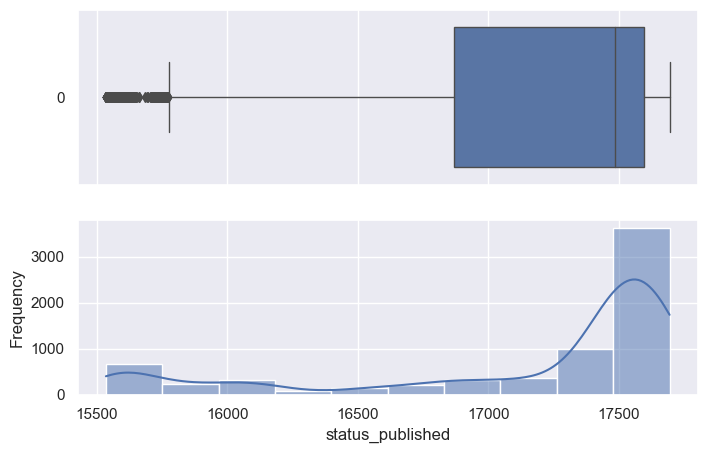

<Figure size 800x500 with 0 Axes>

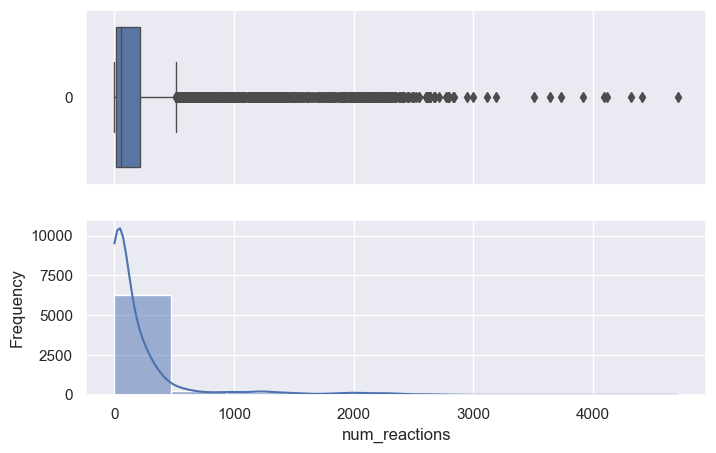

<Figure size 800x500 with 0 Axes>

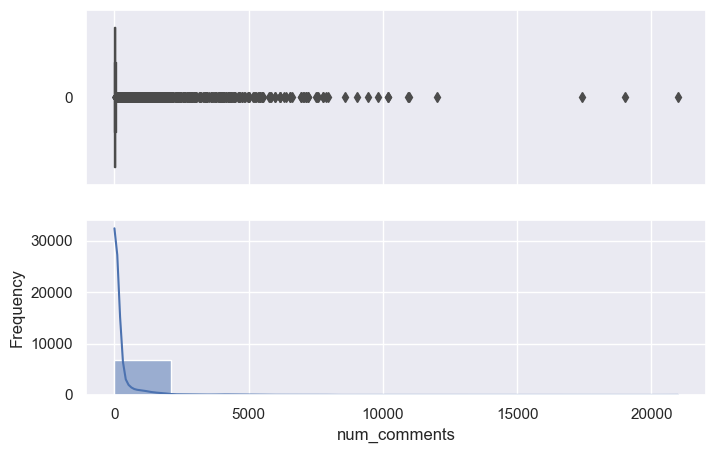

<Figure size 800x500 with 0 Axes>

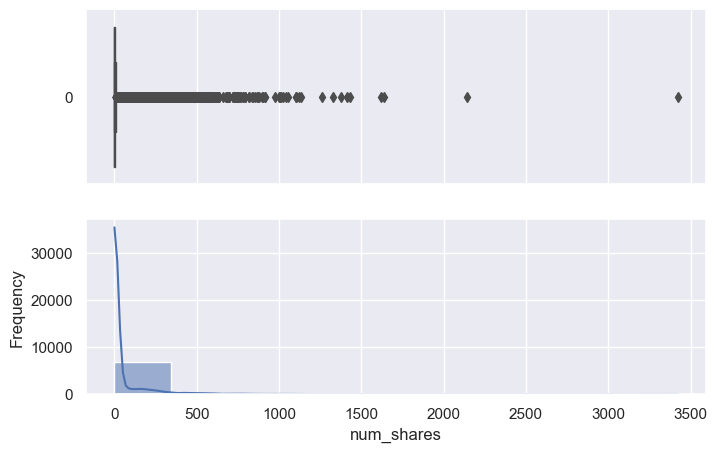

<Figure size 800x500 with 0 Axes>

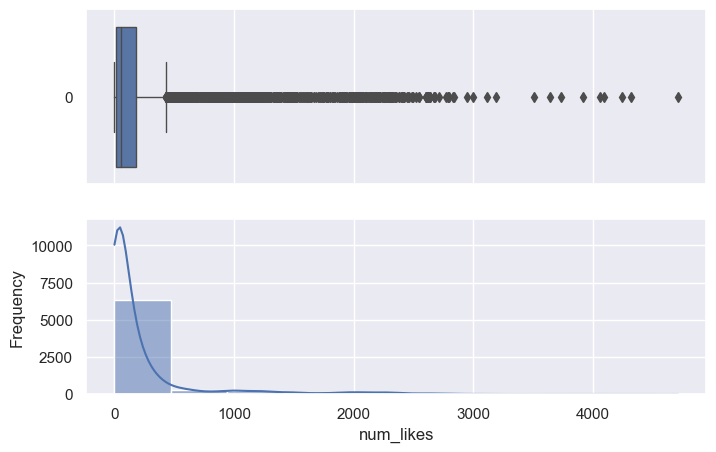

<Figure size 800x500 with 0 Axes>

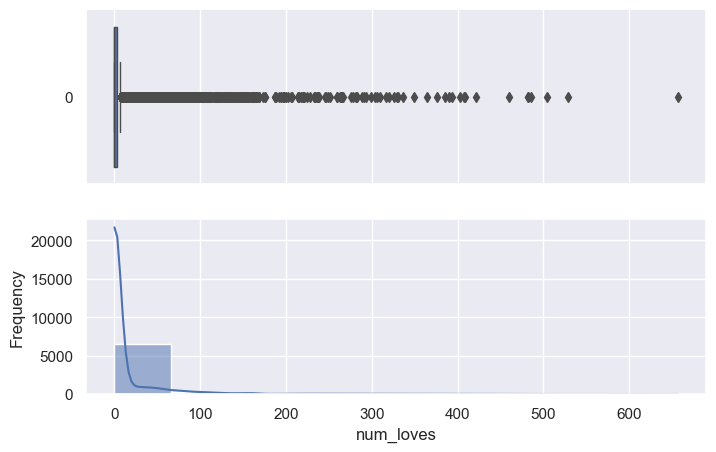

<Figure size 800x500 with 0 Axes>

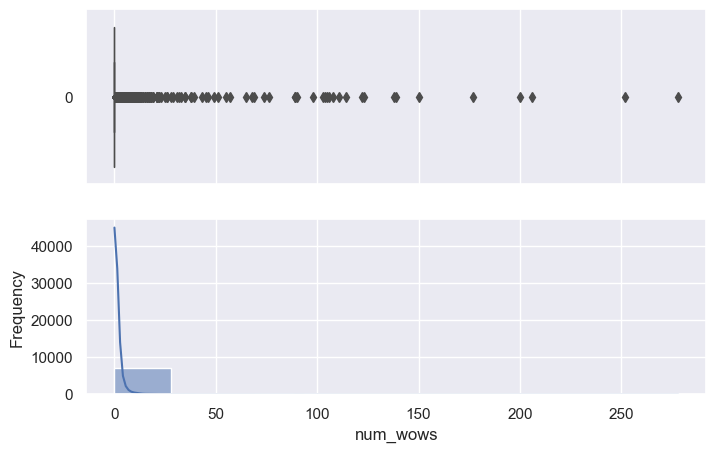

<Figure size 800x500 with 0 Axes>

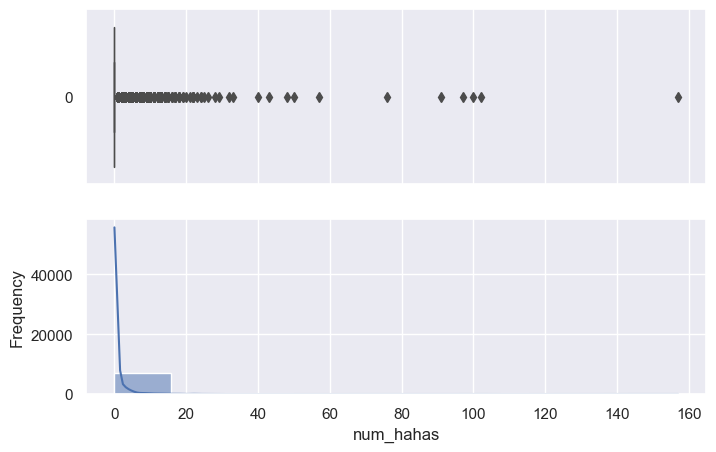

<Figure size 800x500 with 0 Axes>

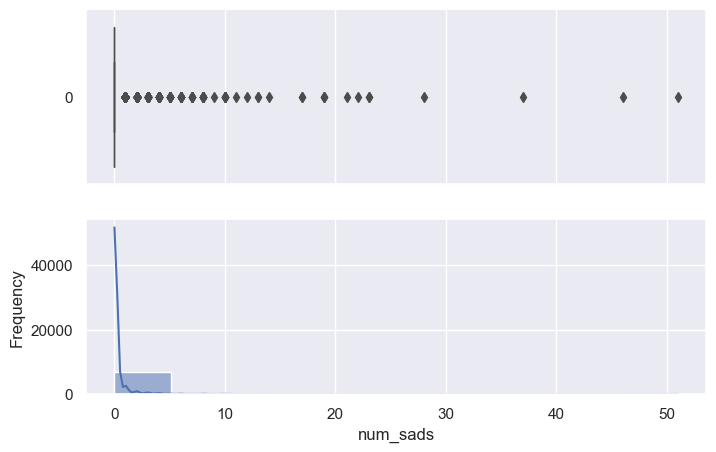

<Figure size 800x500 with 0 Axes>

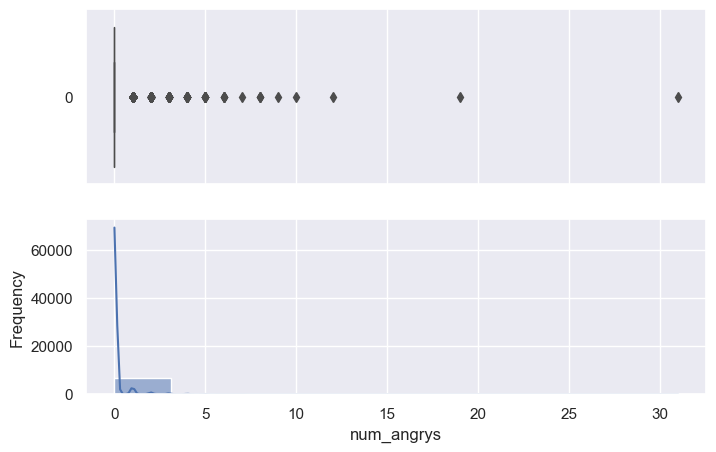

In [21]:
#Obtenemos de forma gráfica un boxPlot de los valores numéricos
for i in df_FaceThai.select_dtypes(include=['float','int']):
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df_FaceThai[i],  ax=ax_box , orient = 'h', linewidth= 1.0)
    sns.histplot(df_FaceThai[i], ax=ax_hist , bins = 10,kde=True)

<div class="alert alert-info alert-info">
 
 Vemos que todos los atributos tienen outliers.
     
 Comprobamos mediante shapiro qué atributos presentan distribución gaussinana.
    
</div> 

In [22]:
from scipy.stats import shapiro

def distr_normal(df):
    normal = []
    for col in df.columns:
        p_valor = shapiro(df[col])[1]
        normal.append(p_valor > 0.05) 
    return normal
resultado = distr_normal(df_FaceThai.select_dtypes(include=['float','int']))
print(resultado)

[False, False, False, False, False, False, False, False, False, False]


<div class="alert alert-info alert-info">
 
 Ningún atributo tiene distribución normal y todos ellos tienen outliers, por lo que aplicaremos **RobustScaler** para escalar los atributos.
    
</div> 

In [23]:
robus_face = RobustScaler()

columns = ['status_published','num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 
                        'num_hahas', 'num_sads', 'num_angrys']
df_FaceThai[columns] = robus_face.fit_transform(df_FaceThai[columns])
df_FaceThai.head()

,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,...,status_type_status,status_type_video,user_id_117059915488335,user_id_134115277150304,user_id_146481362756646,user_id_246675545449582,user_id_614855718638584,user_id_725980084255106,user_id_819700534875473,user_id_848451358648417
0,0.214286,2.366834,23.090909,65.50,2.272727,30.666667,3.0,1.0,1.0,0.0,...,0,1,0,0,0,1,0,0,0,0
1,0.212912,0.462312,-0.181818,0.00,0.563636,0.000000,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
2,0.212912,0.849246,10.545455,14.25,0.890909,7.000000,1.0,1.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,0
3,0.212912,0.266332,-0.181818,0.00,0.327273,0.000000,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
4,0.208791,0.778894,-0.181818,0.00,0.890909,3.000000,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0


In [24]:
df_FaceThai.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 0 to 7049
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   status_published         6999 non-null   float64
 1   num_reactions            6999 non-null   float64
 2   num_comments             6999 non-null   float64
 3   num_shares               6999 non-null   float64
 4   num_likes                6999 non-null   float64
 5   num_loves                6999 non-null   float64
 6   num_wows                 6999 non-null   float64
 7   num_hahas                6999 non-null   float64
 8   num_sads                 6999 non-null   float64
 9   num_angrys               6999 non-null   float64
 10  status_type_photo        6999 non-null   uint8  
 11  status_type_status       6999 non-null   uint8  
 12  status_type_video        6999 non-null   uint8  
 13  user_id_117059915488335  6999 non-null   uint8  
 14  user_id_134115277150304 

In [25]:
df_FaceThai.select_dtypes(include=['float','int']).describe().round(5).T

,count,mean,std,min,25%,50%,75%,max
status_published,6999.0,-0.50263,0.95236,-2.67995,-0.85027,0.0,0.14973,0.28571
num_reactions,6999.0,0.83917,2.27578,-0.29146,-0.20603,0.0,0.79397,23.37688
num_comments,6999.0,10.07055,40.57923,-0.18182,-0.18182,0.0,0.81818,953.90909
num_shares,6999.0,10.06465,33.01173,0.00000,0.00000,0.0,1.00000,856.00000
num_likes,6999.0,0.92695,2.66394,-0.34545,-0.24242,0.0,0.75758,28.20000
num_loves,6999.0,4.25051,13.36896,0.00000,0.00000,0.0,1.00000,219.00000
num_wows,6999.0,1.25289,8.72555,0.00000,0.00000,0.0,0.00000,278.00000
num_hahas,6999.0,0.69796,3.97091,0.00000,0.00000,0.0,0.00000,157.00000
num_sads,6999.0,0.23260,1.48111,0.00000,0.00000,0.0,0.00000,51.00000
num_angrys,6999.0,0.11016,0.68858,0.00000,0.00000,0.0,0.00000,31.00000


<Figure size 800x500 with 0 Axes>

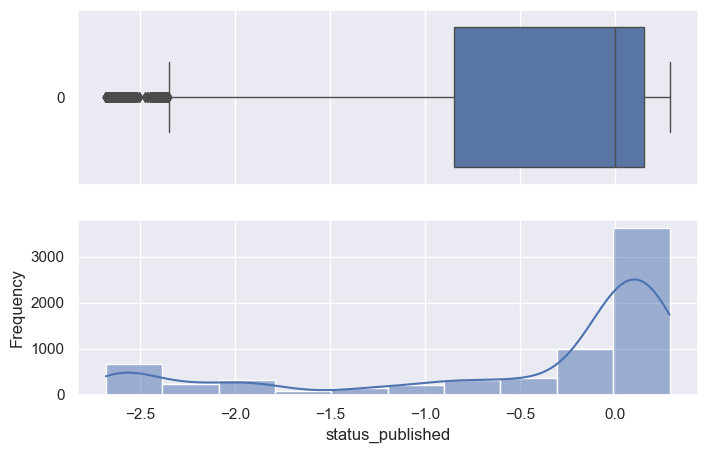

<Figure size 800x500 with 0 Axes>

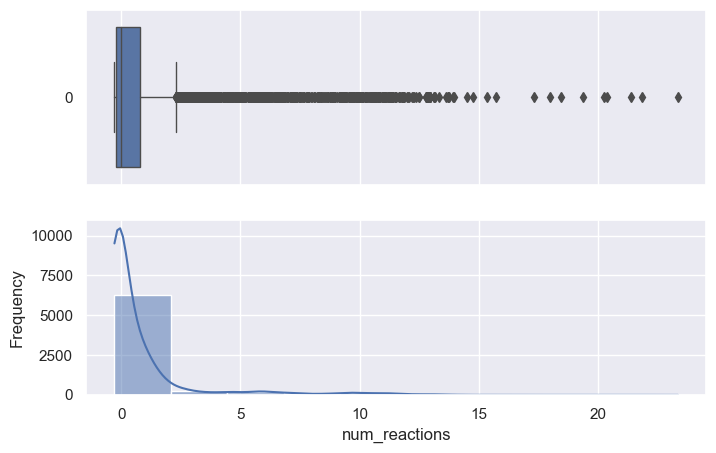

<Figure size 800x500 with 0 Axes>

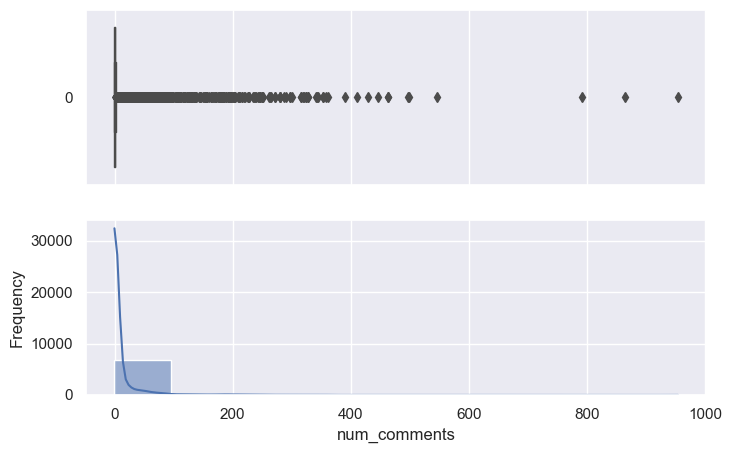

<Figure size 800x500 with 0 Axes>

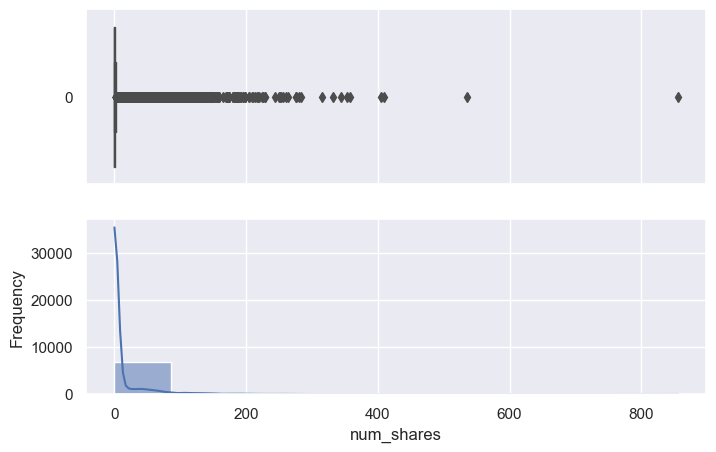

<Figure size 800x500 with 0 Axes>

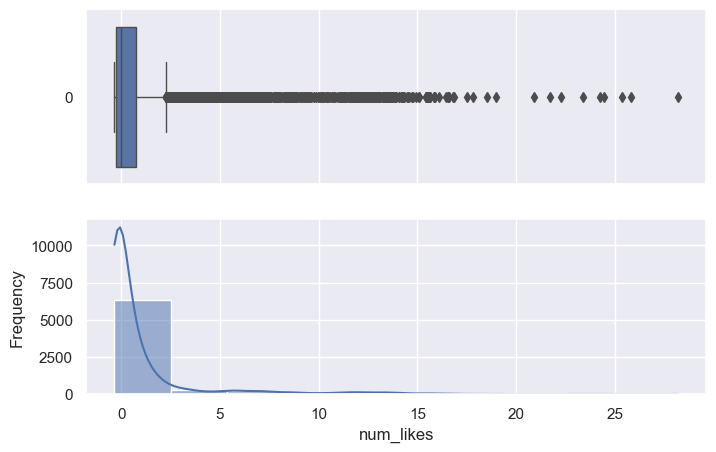

<Figure size 800x500 with 0 Axes>

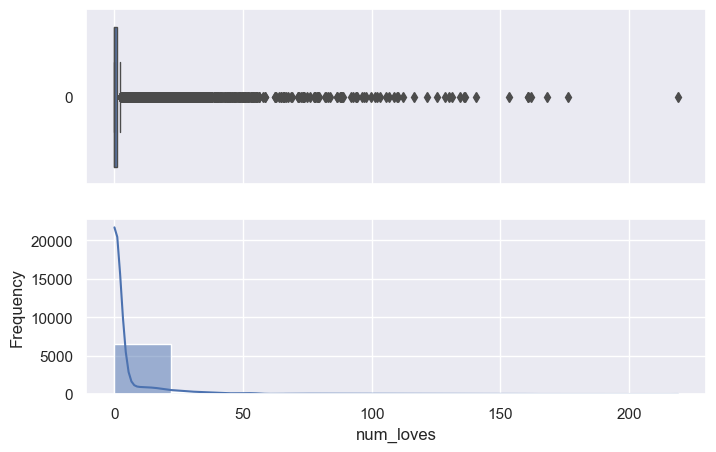

<Figure size 800x500 with 0 Axes>

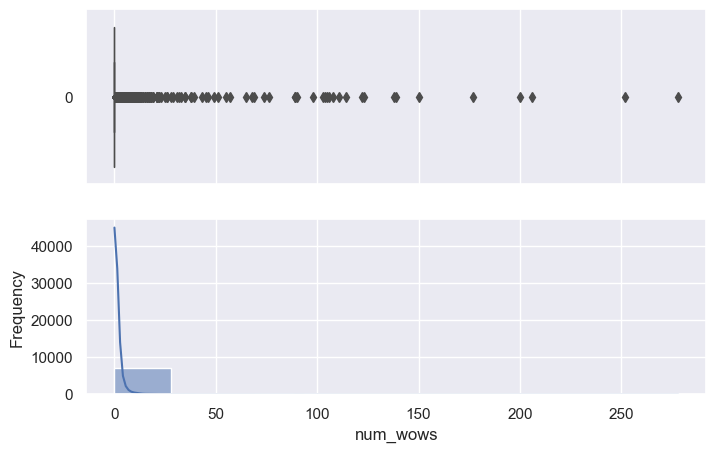

<Figure size 800x500 with 0 Axes>

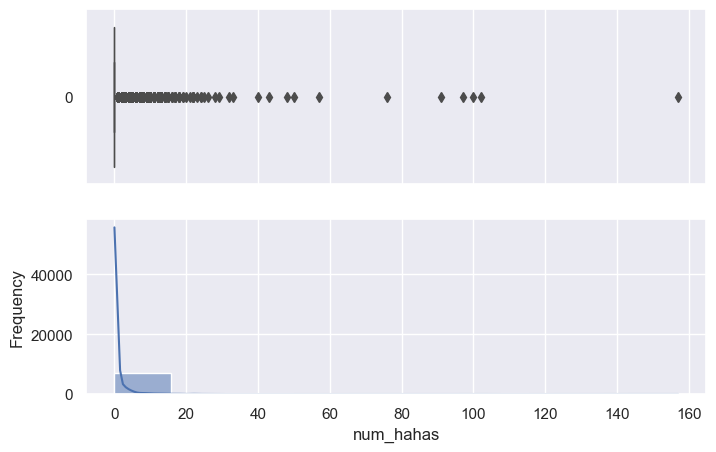

<Figure size 800x500 with 0 Axes>

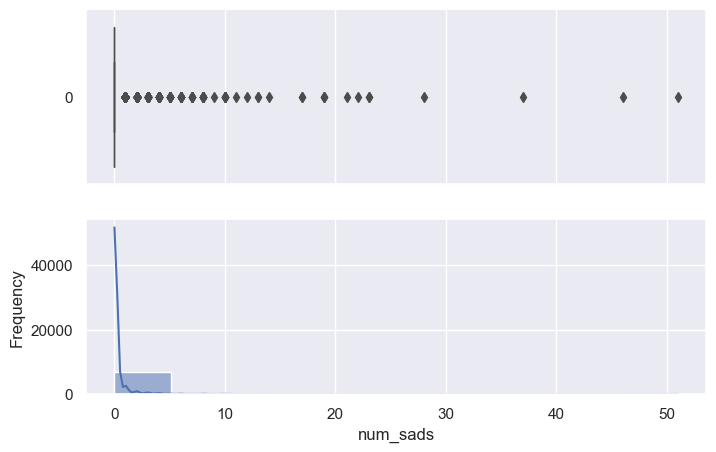

<Figure size 800x500 with 0 Axes>

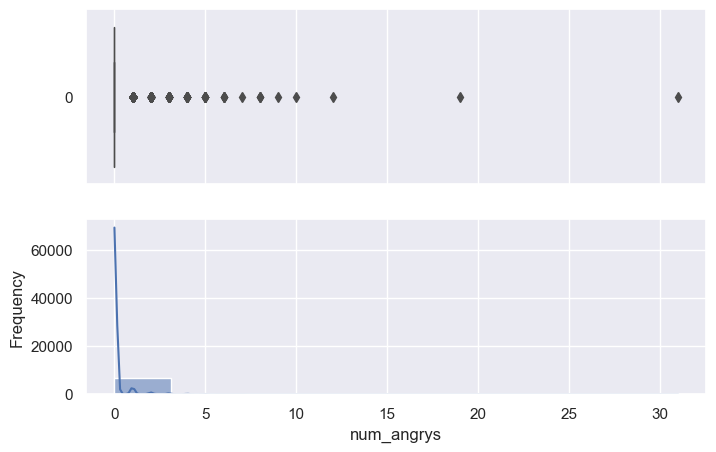

In [26]:
#Obtenemos de forma gráfica un boxPlot de los valores numéricos

for i in df_FaceThai.select_dtypes(include=['float','int']):
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df_FaceThai[i],  ax=ax_box , orient = 'h', linewidth= 1.0)
    sns.histplot(df_FaceThai[i], ax=ax_hist , bins = 10,kde=True)

<div class="alert alert-info alert-info">

En este punto aplicamos **PCA** para reducir dimensionalidad y conseguir un conjunto de variables no correlacionadas. 
PCA puede ayudar a capturar la variabilidad de los atributos originales en un conjunto más pequeño de componentes principales no correlacionados.
    
</div>

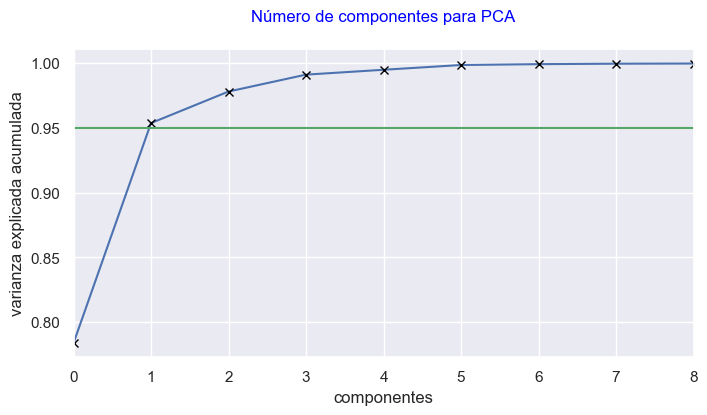

In [27]:
# Instanciamos el objeto y lo entrenamos con el dataframe para encontrar el número de componentes
pca_FaceThai = PCA().fit(df_FaceThai)
plt.figure(figsize = (8, 4))
plt.plot(np.cumsum(pca_FaceThai.explained_variance_ratio_), marker = "x", markersize=6, markeredgecolor='black')
plt.axhline(0.95, color = "g", linestyle = "-")
plt.xlim([0, 8])
plt.xlabel("componentes")
plt.ylabel("varianza explicada acumulada");
plt.title("Número de componentes para PCA", fontsize=12, pad=20, color='blue')
plt.show()

<div class="alert alert-info alert-info">

Podemos ver que con 2 componentes ya tenemos más del  95% de la varianza total en los datos, que es el valor estandar.
    
Esto implica que se están eligiendo suficientes componentes principales para retener una cantidad significativa de información y preservar la estructura subyacente de los datos.

</div>

In [28]:
pca = PCA(n_components=2)
pca.fit(df_FaceThai)
df_pca_FaceThai = pd.DataFrame(pca.transform(df_FaceThai), columns=['pca1', 'pca2'])
df_pca_FaceThai.head(10)

,pca1,pca2
0,48.147293,39.281096
1,-14.874887,-2.241182
2,3.377232,3.442159
3,-14.878970,-2.247807
4,-14.269201,-1.394686
5,-14.266625,-1.785167
6,22.842515,1.439883
7,11.243510,-2.363708
8,-14.500993,-1.796098
9,-14.206616,-2.034403


<div class="alert alert-info alert-info">

Aplicamos el método del codo para determinar el número óptimo de clusters que se deben utilizar en el k-means. Creamos una función que itera sobre diferentes valores y nos muestra una gráfica donde encontrar el "codo" que nos indica el número óptimo de clusters.

</div>

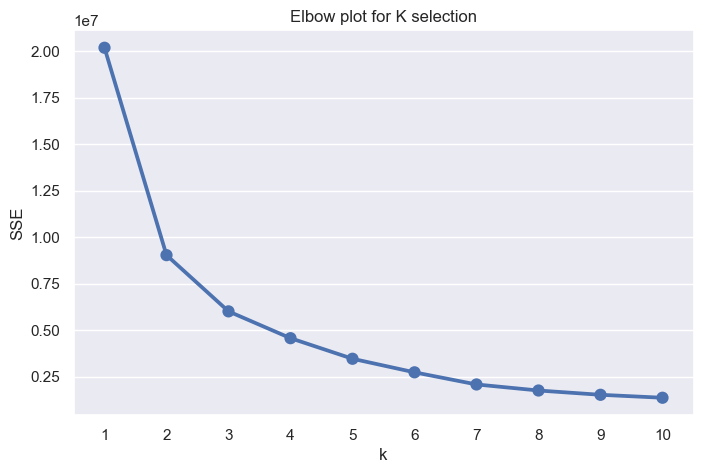

In [29]:
# definimos una función para aplicar el método
def elbow_plot(df):
    
    sse = {}
    sse_r = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(df)
        sse[k] = kmeans.inertia_
        sse_r.append(kmeans.inertia_)
    
    plt.title('Elbow plot for K selection')
    plt.xlabel('k')
    plt.ylabel('SSE')
    sns.pointplot(x=list(sse.keys()),
                 y=list(sse.values()))
    plt.show()
    return sse_r
# Llamamos a la función y le pasamos el resultado de aplicar el PCA
sse = elbow_plot(df_pca_FaceThai)

<div class="alert alert-info alert-info">
Visualmente parece que el número óptimo de clusters es 3, pero para asegurarnos aplicaremos la función KneeLocator y sabrémos el número exacto.
</div>

In [30]:
# creamos una instancia de KneeLocator y le pasamos el resultado de la función anterior.
kl = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")
kl.elbow

3

<div class="alert alert-info alert-info">
Se confirma que el número óptimo de clusters es 3. Creamos una instacia de Kmeans y le pasamos este valor.
</div>

In [31]:
k_means_FaceThai = KMeans(n_clusters=3, random_state=42)
k_means_FaceThai.fit(df_pca_FaceThai)

KMeans(n_clusters=3, random_state=42)

In [32]:
# Recogemos los diferentes clusters obtenidos por kmeans
clusterKme = k_means_FaceThai.predict(df_pca_FaceThai)
clusterKme

array([1, 0, 0, ..., 0, 0, 0])

In [33]:
centroids = k_means_FaceThai.cluster_centers_
centroids

array([[-11.09682355,  -1.20191992],
       [100.18123926,  25.01756397],
       [335.02631904, -56.97688954]])

In [34]:
k_means_FaceThai.inertia_

6010811.347396772

In [35]:
# Añadimos al DataFrame original una nueva clumna con el valor del cluster correspondiente.
df_FaceThai['ClusterKme'] = clusterKme
df_FaceThai

,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,...,status_type_video,user_id_117059915488335,user_id_134115277150304,user_id_146481362756646,user_id_246675545449582,user_id_614855718638584,user_id_725980084255106,user_id_819700534875473,user_id_848451358648417,ClusterKme
0,0.214286,2.366834,23.090909,65.50,2.272727,30.666667,3.0,1.0,1.0,0.0,...,1,0,0,0,1,0,0,0,0,1
1,0.212912,0.462312,-0.181818,0.00,0.563636,0.000000,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2,0.212912,0.849246,10.545455,14.25,0.890909,7.000000,1.0,1.0,0.0,0.0,...,1,0,0,0,1,0,0,0,0,0
3,0.212912,0.266332,-0.181818,0.00,0.327273,0.000000,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,0.208791,0.778894,-0.181818,0.00,0.890909,3.000000,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,-0.575549,0.155779,-0.181818,0.00,0.193939,0.000000,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7046,-0.576923,-0.211055,-0.181818,0.00,-0.260606,0.333333,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7047,-0.579670,-0.281407,-0.181818,0.00,-0.339394,0.333333,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7048,-0.581044,1.472362,0.363636,5.50,1.769697,0.666667,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
df_FaceThai['ClusterKme'].value_counts()

0    6452
1     475
2      72
Name: ClusterKme, dtype: int64

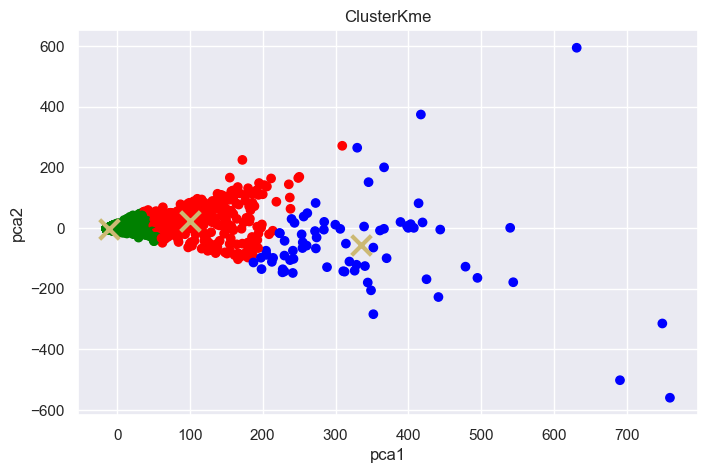

In [37]:
# Crear el gráfico de dispersión con diferentes colores para los clusters
colors = ListedColormap(['green', 'red', 'blue'])
plt.scatter(df_pca_FaceThai.iloc[:, 0], df_pca_FaceThai.iloc[:, 1], c=clusterKme, cmap=colors)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='y')
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.title('ClusterKme')
plt.show()

<div class="alert alert-info alert-info">

Podemos ver un gráfico de dispersión que representa la relación entre los atributos _num_reactions_ y _num_likes_ y los clusters obtenidos. Cada punto en el gráfico representa una observación con sus valores en los dos atributos seleccionados.
    
Esto nos permite visualizar cómo los atributos se distribuyen en relación con los clusters y cómo se agrupan las observaciones.

</div>

<div class="alert alert-info alert-info"><b><h1>EXERCICI 2</h1></b>
    
Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.
    
</div>

<div class="alert alert-info alert-info">
    
Generamos un dendrograma para ver de forma gráfica la estructura de agrupamiento de los datos.

Proporciona una visión intuitiva de las relaciones de similitud o distancia entre las observaciones y cómo se agrupan en clusters.
    
</div>

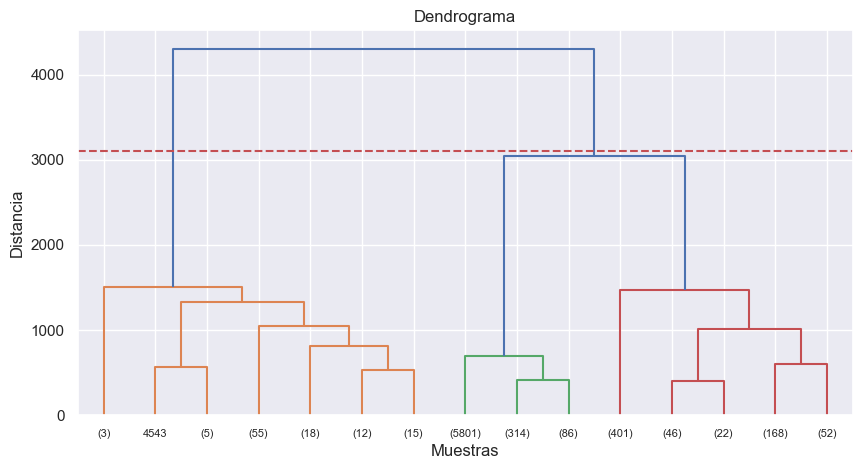

Número clusters: 2


In [38]:
# Calculamos la distancia entre los clusters mediante el método de enlace 'ward'
Z = linkage(df_pca_FaceThai.values, method='ward')
plt.figure(figsize=(10, 5))
#Creamos el dendrograma
dendrogram(Z,leaf_font_size=8,truncate_mode='lastp', p=15)
# Determinamos el punto de corte deseado
max_d = 3100 
# creamos los clusters
clusters = fcluster(Z, max_d, criterion='distance')

plt.axhline(y=max_d, color='r', linestyle='--')  # Línia horitzontal del punt de tall
plt.title('Dendrograma')
plt.xlabel('Muestras')
plt.ylabel('Distancia')
plt.show()

num_clusters = len(set(clusters))
print("Número clusters:", num_clusters)

In [39]:
# Aplicamos el modelo con el número de clusters obtenidos en el dendrograma
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit(df_pca_FaceThai)
clusterAgg = model.labels_
clusterAgg

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
# Añadimos al DataFrame original una nueva columna con el valor del cluster obtenido con AgglomerativeClustering.
df_FaceThai['ClusterAgg'] = clusterAgg
df_FaceThai.head()

,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,...,user_id_117059915488335,user_id_134115277150304,user_id_146481362756646,user_id_246675545449582,user_id_614855718638584,user_id_725980084255106,user_id_819700534875473,user_id_848451358648417,ClusterKme,ClusterAgg
0,0.214286,2.366834,23.090909,65.50,2.272727,30.666667,3.0,1.0,1.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,0.212912,0.462312,-0.181818,0.00,0.563636,0.000000,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
2,0.212912,0.849246,10.545455,14.25,0.890909,7.000000,1.0,1.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
3,0.212912,0.266332,-0.181818,0.00,0.327273,0.000000,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
4,0.208791,0.778894,-0.181818,0.00,0.890909,3.000000,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0


In [41]:
df_FaceThai['ClusterAgg'].value_counts()

0    6890
1     109
Name: ClusterAgg, dtype: int64

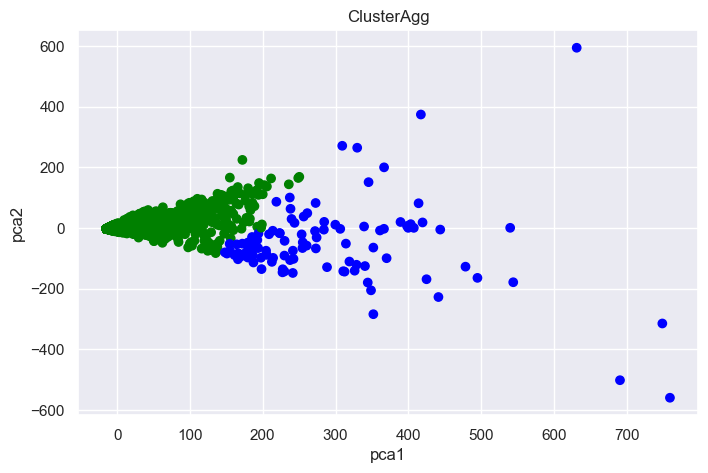

In [42]:
# Crear el gráfico de dispersión con diferentes colores para los clusters
colors = ListedColormap(['green', 'red', 'blue'])
plt.scatter(df_pca_FaceThai.iloc[:, 0], df_pca_FaceThai.iloc[:, 1], c=clusterAgg, cmap=colors)
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.title('ClusterAgg')
plt.show()

<div class="alert alert-info alert-info"><b><h1>EXERCICI 3</h1></b>
    
Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.
    
</div>

In [43]:
Kmeans_silhouette = silhouette_score(df_pca_FaceThai, clusterKme)
Hclustering_silhouette = silhouette_score(df_pca_FaceThai, clusterAgg)

print("Resultado silhouette Kmeans:", Kmeans_silhouette.round(5)*100)
print("Resultado silhouette Hclustering:", Hclustering_silhouette.round(5)*100)

Resultado silhouette Kmeans: 87.649
Resultado silhouette Hclustering: 91.783


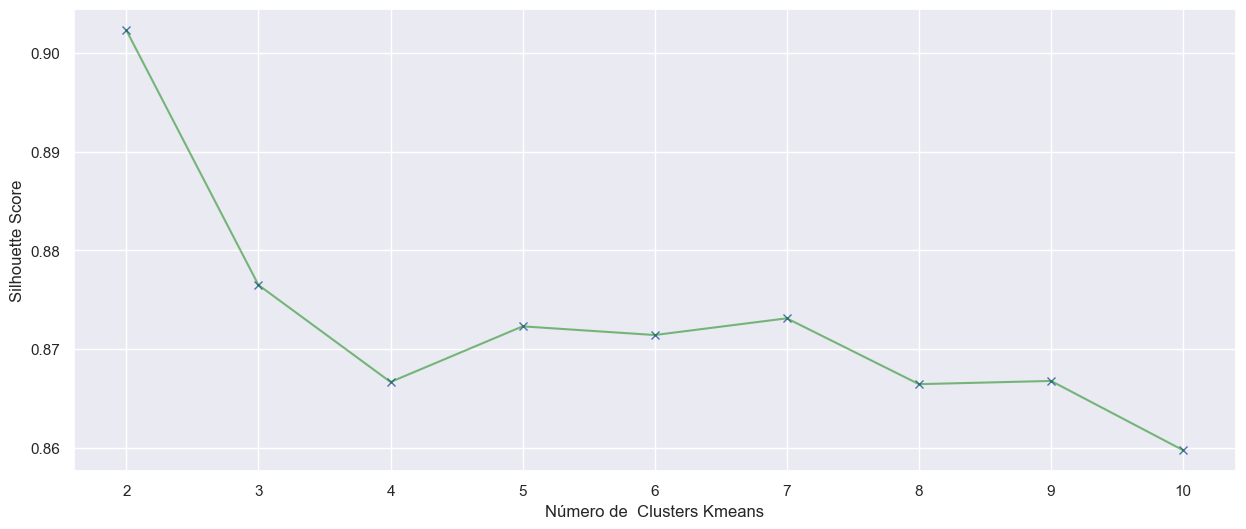

In [44]:
#Realizamos una gráfica que nos muestre el score para Kmeans 
ss_all = []
for n in range(2, 11):
    km = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300, 
                        tol=0.0001, random_state= 35))
    predict = km.fit_predict(df_pca_FaceThai)
    score = silhouette_score(X = df_pca_FaceThai, labels = predict)
    ss_all.append(score)
plt.figure(figsize = (15 ,6))
plt.plot(np.arange(2, 11) , ss_all , 'x')
plt.plot(np.arange(2 , 11) , ss_all , '-' , alpha = 0.5, color = 'green')
plt.xlabel('Número de  Clusters Kmeans') , plt.ylabel('Silhouette Score')
plt.show()

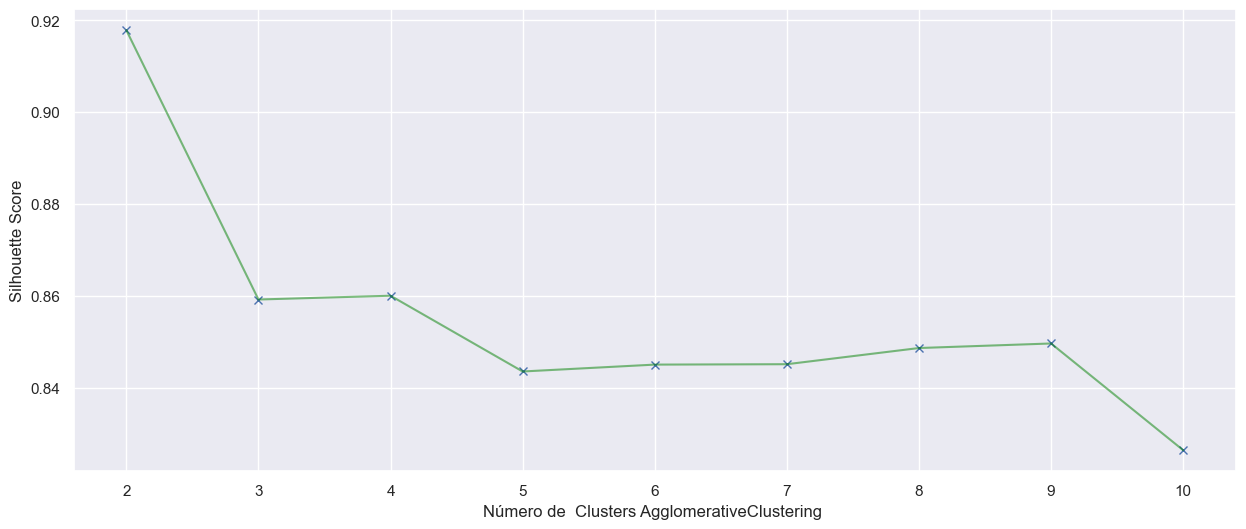

In [45]:
#Realizamos una gráfica que nos muestre el score para AgglomerativeClustering
ss_all = []
for n in range(2, 11):
    ac = (AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage='ward'))
    predict = ac.fit_predict(df_pca_FaceThai)
    score = silhouette_score(X = df_pca_FaceThai, labels = predict)
    ss_all.append(score)
plt.figure(figsize = (15 ,6))
plt.plot(np.arange(2 , 11) , ss_all , 'x')
plt.plot(np.arange(2 , 11) , ss_all , '-' , alpha = 0.5, color = 'green')
plt.xlabel('Número de  Clusters AgglomerativeClustering ') , plt.ylabel('Silhouette Score')
plt.show()

<div class="alert alert-info alert-info">
    
Podemos afirmar que el mejor resultado lo hemos obtenido mediante el modelo **AgglomerativeClustering** y que hemos utilizado el número correcto de clusters. En el caso del modelo **Kmeans** según los datos de la gráfica silhouette tendríamos que haber reducido el número de cluster a 2 para obtener un resultado similar al **AgglomerativeClustering**.

El modelo **Kmeans** está preparado para trabajar con atributos que tengan datos contínuos, por lo que las variables categóricas pueden perjudicar los resultados.
    
</div>